<a href="https://colab.research.google.com/github/bozorgpanah/The-Explainable-Machine-Learning-Model-withPrivacy/blob/main/Paper1/Noise_Addition_brest_cancer_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Laplace-and-Exponential-mechanisms-for-privacy
#*******************************************************************************************************************************
"""Application of Laplace and Exponential mechanisms to add random noise to data for differential privacy. 
Plotting MSE vs. epsilon."""

'Application of Laplace and Exponential mechanisms to add random noise to data for differential privacy. \nPlotting MSE vs. epsilon.'

In [ ]:
#Uploading a dataset from local drive to colab
from google.colab import files
uploaded = files.upload()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import io
import csv

##Reading dataset
df = pd.read_csv(io.BytesIO(uploaded['brest_cancer.csv'])) #Dataset's name == 
# Dataset is now stored in a Pandas Dataframe
df.info()


# now check for missing values in total bedrooms
df.isnull().sum()
# ------------------------------------------------------------------


Saving brest_cancer.csv to brest_cancer.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   48           115 non-null    int64  
 1   23.5         115 non-null    float64
 2   70           115 non-null    int64  
 3   2.707        115 non-null    float64
 4   0.467408667  115 non-null    float64
 5   8.8071       115 non-null    float64
 6   9.7024       115 non-null    float64
 7   7.99585      115 non-null    float64
 8   417.114      115 non-null    float64
 9   1            115 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.1 KB


48             0
23.5           0
70             0
2.707          0
0.467408667    0
8.8071         0
9.7024         0
7.99585        0
417.114        0
1              0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

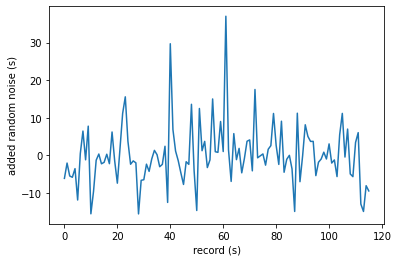

'\n# Generate noisy histogram\nnoisydata.plot(kind="bar",color = \'g\')\n'

In [ ]:
# Implementing Laplace mechanism on brest_cancer dataset by adding Laplacian random noise
import sys
import csv
# Load brest_cancer dataset 
dataset = pd.read_csv(io.BytesIO(uploaded['brest_cancer.csv']), names=["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP.1", "Classification"])
dataset.tail()

# Set parameters for Laplace function implementation
location = 0.0
scale = 5.0 # b
names=["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP.1", "Classification"]

for i in names:
   # Gets random laplacian noise for all values
   Laplacian_noise = np.random.laplace(location, scale, 116)
   Noise_ = Laplacian_noise + dataset[i]
   #print(Noise_)
   df[i] = Noise_
   #print(i)
df.to_csv("sample.csv", index=False)
files.download("sample.csv")

# Data for plotting
t = np.arange(0.0, 116)
s = Laplacian_noise
plt.xlabel('record (s)')
plt.ylabel('added random noise (s)')
   
plt.plot(t, s)
plt.show()

"""
# Generate noisy histogram
noisydata.plot(kind="bar",color = 'g')
"""

In [ ]:
#SHAP
!pip install shap #Install SHAP library

     |████████████████████████████████| 356 kB 4.9 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491645 sha256=e8280b45ab05527a4ea70666ae427e8db5f9bb108e4ea51f1825486ccece59eb
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
#Uploading a dataset from local drive to colab
from google.colab import files
uploaded = files.upload()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import io

##Reading dataset
df = pd.read_csv(io.BytesIO(uploaded['MaskedDataset_brestCancer_Laplacian_noise_b=5.csv'])) 
# Dataset is now stored in a Pandas Dataframe
df.info()

# now check for missing values in total bedrooms
df.isnull().sum()
# ------------------------------------------------------------------



Saving MaskedDataset_brestCancer_Laplacian_noise_b=5.csv to MaskedDataset_brestCancer_Laplacian_noise_b=5 (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             115 non-null    float64
 1   BMI             115 non-null    float64
 2   Glucose         115 non-null    float64
 3   Insulin         115 non-null    float64
 4   HOMA            115 non-null    float64
 5   Leptin          115 non-null    float64
 6   Adiponectin     115 non-null    float64
 7   Resistin        115 non-null    float64
 8   MCP.1           115 non-null    float64
 9   Classification  115 non-null    float64
dtypes: float64(10)
memory usage: 9.1 KB


Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [ ]:
import math
##Feature Vector and Target Variable
X = df[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']] #Feature Vector              
y = df['Classification'] #Target Variable

##Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

"""
print(X_train,y_train)
print("##################")
print(X_test,y_test)
"""
##Building the model with --> Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

##Generating Predictions
y_pred = model.predict(X_test)
print("Prediction: ", y_pred)

##Evaluating Performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
print("mean_squared_error: ", mse)

rmse = math.sqrt(mse)
print('\n\nAccuracy for Random Forest:',100*max(0,rmse))

Prediction:  [-3.5072711   1.17818895 -0.47911207  8.50929317  5.75592302  7.66616527
 12.18542394  4.98356433  4.93057567 -1.15686712  5.34612587  4.96262593
  1.67294399  2.41637784  1.76991881 -2.46058515  3.89187285  5.10379926
  1.96684555  1.64659986  4.79430778  9.475468    2.25469577 -0.04775665
 -3.00286037  2.76377012  2.47451199 -9.5138454   8.19653744 -1.14013637
  1.89661539  0.74206993  1.45588596  4.83692486  1.27607975]
mean_squared_error:  8.995263067113946


Accuracy for Random Forest: 299.9210407276213


In [ ]:
##SHAP Explanation
#Force Plots
# import shap library
import shap 
from IPython.display import display

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
display(shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:]))


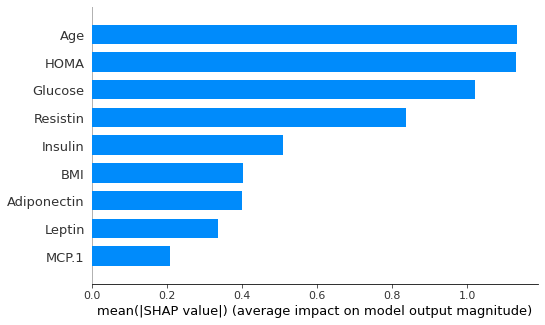

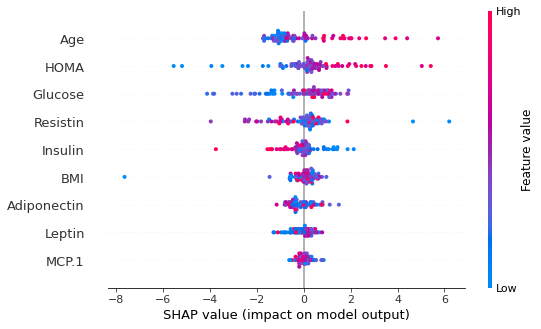

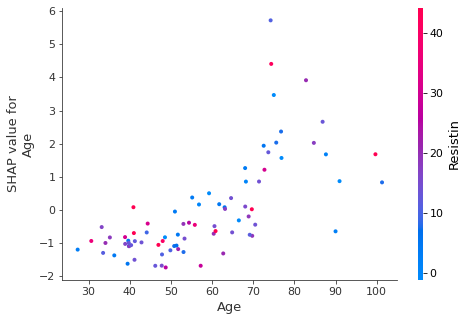

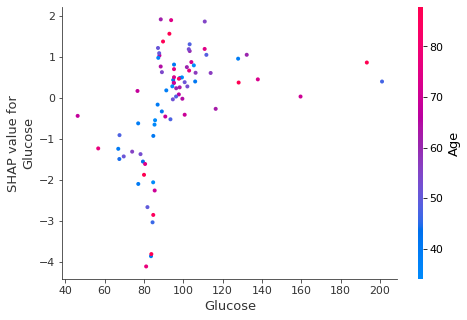

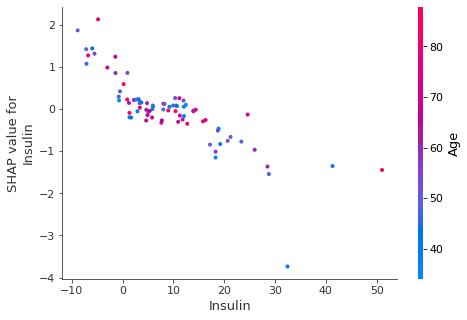

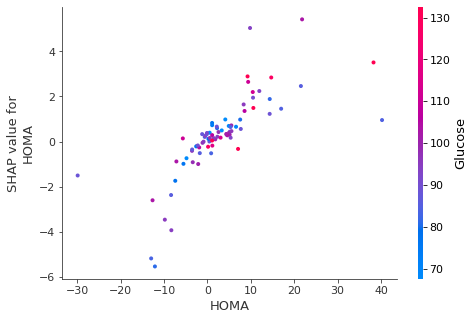

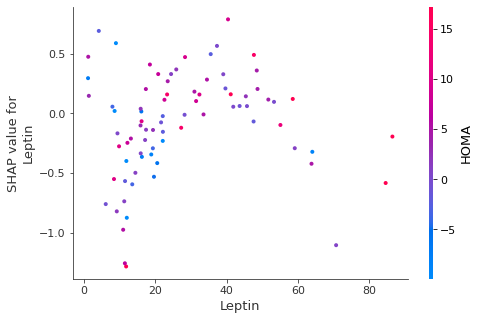

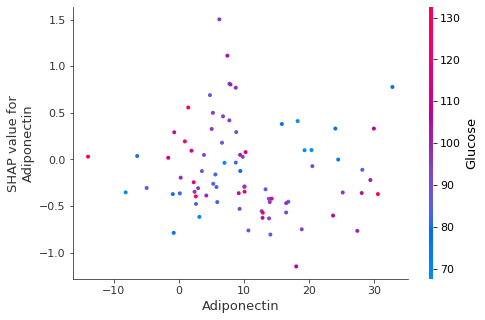

In [ ]:
shap.initjs()
# visualize the training set predictions
#shap.force_plot(explainer.expected_value, shap_values, X_train)

##SHAP Feature Importance
shap_values = shap.TreeExplainer(model).shap_values(X_train)

#x = shap_values.mean()
#print(x)
#print(shap_values)

shap.summary_plot(shap_values, X_train, plot_type="bar")

##SHAP Summary Plot
shap.summary_plot(shap_values, X_train)

##SHAP Dependence Plot
shap.dependence_plot('Age', shap_values, X_train)
shap.dependence_plot('Glucose', shap_values, X_train)
shap.dependence_plot('Insulin', shap_values, X_train)
shap.dependence_plot('HOMA', shap_values, X_train)
shap.dependence_plot('Leptin', shap_values, X_train)
shap.dependence_plot('Adiponectin', shap_values, X_train)

In [ ]:
###The below code is suitable to |ADDING NOISE from Exponential mechanism| 
###I can continue it in other papers

In [ ]:
""" Program to add noise generated from Exponential mechanism
    to Original brest_cancer dataset.
"""  
# Load the brest_cancer dataset
dataset = pd.read_csv(io.BytesIO(uploaded['brest_cancer.csv']), names=["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP.1", "Classification"])

dataset.tail()
#print(dataset)

datacount = dataset["Avg. Area Income"].value_counts()

# Generate random noise from exponential function.
Exponential_noise = np.random.exponential(1)     # Keep max limit = 1

print ("Exponentially generated noise:", Exponential_noise)

"""Add random noise drawn from Exponential function to Original data count"""
noisydata = datacount + Exponential_noise

#save noisy dataset
dataset["Avg. Area Income"] = noisydata
#print(dataset)
dataset.to_csv ("MaskedDataset_Exponential_noise.csv")
files.download("MaskedDataset_Exponential_noise.csv")


#Plot histogram for Noisy data
noisydata.plot(kind="bar", color = 'r')

Average Mean Square Error is- 
0.09475009322020045


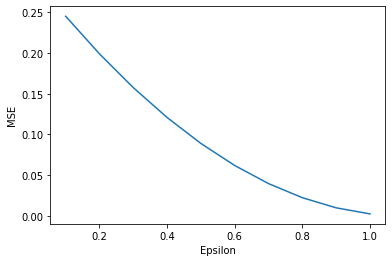

In [ ]:
# Program to compute Mean Squared Error(MSE) and show plot between Epsilon and MSE
# in Laplace Mechanism
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Load the brest_cancer dataset 
dataset =  pd.read_csv(io.BytesIO(uploaded['brest_cancer.csv']), names=["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP.1", "Classification"])
dataset.tail()

# Laplace function implementation, takes epsilon as an argument
def Laplacian_func(eps):     
 x = 0.01
 mu = 0                    # mean
 return ((eps/2.0) * np.exp(-abs(x - mu)*eps))
 
datacount = dataset["Country"].value_counts()    #Store actual data count
tmp = []
mselist = []
fig=plt.figure()

# Call laplace for all values of epsilon, calculate MSE for each case and plot.
noise = Laplacian_func(0.1)
noisydata = datacount + noise
mse = ((datacount- noisydata)**2).mean(axis=0)  
mselist.append(mse)
noise = Laplacian_func(0.2)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0) 
mselist.append(mse)
noise = Laplacian_func(0.3)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)  
mselist.append(mse)
noise = Laplacian_func(0.4)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0) 
mselist.append(mse)
noise = Laplacian_func(0.5)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)
noise = Laplacian_func(0.6)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)
noise = Laplacian_func(0.7)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)
noise = Laplacian_func(0.8)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)
noise = Laplacian_func(0.9)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)
noise = Laplacian_func(1.0)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)

for i in range(0,50):
  for j in list(mselist):
      tmp.append(j)      
print ("Average Mean Square Error is: ") 
print (np.average(tmp))   

epsval = [1.0] 
x = 1.0
for i in range(1,10):
   x -= 0.1
   epsval.append(x)   
ax = fig.add_subplot(111)
ax.plot(epsval,mselist)
plt.xlabel('Epsilon')
plt.ylabel('MSE')
plt.show()


In [ ]:
# Find sensitivity - New dataset
import pandas as pd

#Load both datasets - brest_cancer (actual) dataset and modified dataset                                 
Actual_dataset = pd.read_csv(io.BytesIO(uploaded['brest_cancer.csv']), names=["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP.1", "Classification"])      
Actual_dataset.tail()    

Neighbouring_dataset = pd.read_csv("adultnew.data.txt", names=["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP.1", "Classification"],engine='python',sep=r'\s*,\s*',na_values="?")     
Neighbouring_dataset.tail()

#Count of brest_cancer dataset 
Actual_attribute = Actual_dataset["Country"].value_counts()

#Count of modified dataset
Modified__attribute = Neighbouring_dataset["Country"].value_counts() 

#Sensitivity between above datasets
Sensitivity = max(abs(Modified__attribute - Actual_attribute))
print ("Sensitivity of neighbouring databases is:", Sensitivity)
 


Most native country is:  United-States    0.895829
Name: Country, dtype: float64


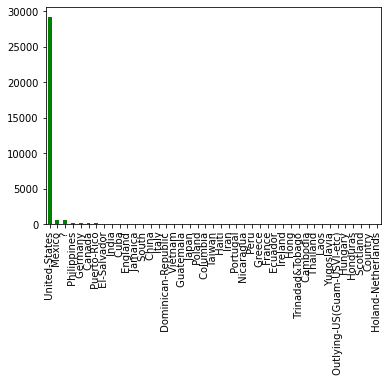

In [ ]:
""" Program to show implementation of Utility/Score function
    to release the name of Most native country """
    
# Import Libraries
import pandas as pd
import numpy as np

#Load the brest_cancer dataset
dataset = pd.read_csv(io.BytesIO(uploaded['brest_cancer.csv']), names=["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP.1", "Classification"])
dataset.tail()

"""Utility/Score function implementation"""
def Utility_function() :
   # Finds country with most number of entries 
   Utility = ((dataset["Country"].value_counts() / dataset.shape[0])).head(1)
   if dataset.dtypes["Country"] == np.object:
     dataset["Country"].value_counts().plot(kind="bar", color = 'g')
   return Utility  

#Call Utility function()
utility = Utility_function()  
print ("Most native country is:", utility)  
